# Abgabe Ingeneursinformatik Prokjekt

## Import Libaries

In [35]:
# Load standard libraries
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split 
from sklearn import metrics 

#Libraries of machine learning models
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

# Libraries for visualization of the desicion tree
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

# Libraries for own image import
import numpy as np
import cv2
from PIL import Image
import os


## Import and prepare MNIST-Dataset

In [6]:
from keras.datasets import mnist

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

The next step shows how the image in the MNIST-Dataset looks like.

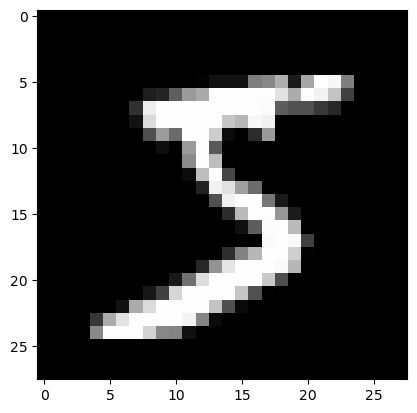

In [8]:
plt.imshow(X_train[0], cmap='gray')

In [9]:
#Anzeigen, wie die Daten vorliegen (Trainings- und Testdaten mit Pixelnanzahl)
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [10]:
# Bilder in Vektoren umformen
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [11]:
# Überprüfung ob Umformung funktioniert hat
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [12]:
#Normalisierung der Daten
X_train = X_train/255
X_test = X_test/255

## Machine Learning Modelle

### Desicion Tree

In [13]:
dTree = DecisionTreeClassifier(criterion="entropy", max_depth=5).fit(X_train,y_train)

In [14]:
dTree_prediction = dTree.predict(X_test)

#### Visualisation of the descision tree

In [ ]:
def create_graph(decision_tree):
    dot_data = StringIO()
    export_graphviz(decision_tree, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True,feature_names = feature_cols,class_names=['0','1','2','3','4','5','6','7','8','9'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    graph.write_png('dTree.png')
    return graph

In [ ]:
fig = plt.figure(figsize=(25,20))
fig.plot_tree(dTree)

In [ ]:
graph = create_graph(dTree)
Image(graph.create_png())

### Adaptive Boosting


In [15]:
adaBoost = AdaBoostClassifier(n_estimators=5, algorithm="SAMME").fit(X_train,y_train)

In [16]:
adaBoost_predict = adaBoost.predict(X_test)

### k-nearest-neighbour

In [17]:
kNeigh = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)

In [18]:
kNeigh_predict = kNeigh.predict(X_test)

### Naive Bayers

In [19]:
gnb = GaussianNB().fit(X_train,y_train)

In [20]:
gnb_predict = gnb.predict(X_test)

### Random Forest

In [21]:
randForest = RandomForestClassifier(n_estimators=5).fit(X_train,y_train)

In [22]:
randForest_predict = randForest.predict(X_test)

### Neural Network

#### Limited-memory BFGS

In [65]:
nn_lbfgs = MLPClassifier(solver='lbfgs', alpha=1, hidden_layer_sizes=(784, 10), random_state=1, max_iter=200).fit(X_train,y_train)

/opt/conda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [71]:
nn_lbfgs_preditct = nn_lbfgs.predict(X_test)

#### Adam: A Method for Stochastic Optimization

In [26]:
nn_adam = MLPClassifier(solver='adam', alpha=1, hidden_layer_sizes=(784, 10), random_state=1, max_iter=5).fit(X_train,y_train)

/opt/conda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


In [27]:
nn_adam_preditct = nn_adam.predict(X_test)

#### Stochastic gradient descent

In [28]:
nn_sgd = MLPClassifier(solver='sgd', alpha=1, hidden_layer_sizes=(784, 10), random_state=1, max_iter=5).fit(X_train,y_train)

/opt/conda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


In [29]:
nn_sgd_preditct = nn_sgd.predict(X_test)

## Eigene Bilder eingeben

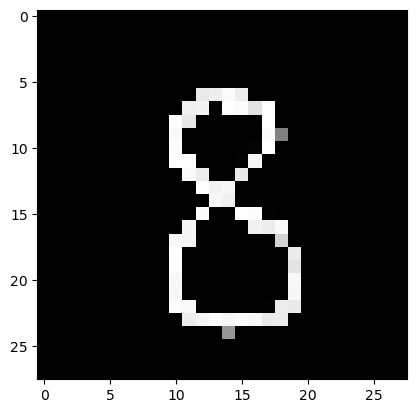

Das Bild wurde erfolgreich im Ordner output_folder/ gespeichert.


In [66]:
def resize_to_28x28(img):
    # Bestimmen der Höhe und Breite des Bildes
    img_h, img_w = img.shape
    dim_size_max = max(img.shape)

    # Skalieren des Bildes auf 26 Pixel, wobei das Seitenverhältnis beibehalten wird
    if dim_size_max == img_w:
        im_h = (26 * img_h) // img_w
        if im_h <= 0 or img_w <= 0:
            print("Invalid Image Dimension: ", im_h, img_w, img_h)
        tmp_img = cv2.resize(img, (26, im_h), 0, 0, cv2.INTER_NEAREST)
    else:
        im_w = (26 * img_w) // img_h
        if im_w <= 0 or img_h <= 0:
            print("Invalid Image Dimension: ", im_w, img_w, img_h)
        tmp_img = cv2.resize(img, (im_w, 26), 0, 0, cv2.INTER_NEAREST)

  # Erstellen eines quadratischen Bildes mit 28x28 Pixeln und Einfügen des skalierten Bildes
    out_img = np.full((28, 28), 0, dtype=np.ubyte)  # Rand weiß initialisieren

    # Berechnen der Position, um das skalierte Bild in der Mitte des quadratischen Bildes zu platzieren
    nb_h, nb_w = out_img.shape
    na_h, na_w = tmp_img.shape
    x_min = (nb_h - na_h) // 2
    x_max = x_min + na_h
    y_min = (nb_w - na_w) // 2
    y_max = y_min + na_w

    # Einfügen des skalierten Bildes in das quadratische Bild
    out_img[x_min:x_max, y_min:y_max] = 255 - tmp_img

    return out_img
    return out_img

# Pfad zu deinem Bild
image_path = "8.jpg"


# Bild laden und in Graustufen umwandeln
img = Image.open(image_path).convert('L')
img = np.array(img)

# Bild auf 28x28 Pixel skalieren
mnist_formatted_img = resize_to_28x28(img)

# Ausgabe des Bildes überprüfen
import matplotlib.pyplot as plt

plt.imshow(mnist_formatted_img, cmap='gray')
plt.show()

# Pfad zum Ordner, in dem das Bild gespeichert werden soll
output_folder = 'output_folder/'

# Erstellen des Ordners, falls er nicht existiert
os.makedirs(output_folder, exist_ok=True)

# Bild als Datei im Ordner speichern
output_path = os.path.join(output_folder, 'mnist_formatted_image.png')
Image.fromarray(mnist_formatted_img).save(output_path)

print(f"Das Bild wurde erfolgreich im Ordner {output_folder} gespeichert.")

In [72]:
image_path = 'output_folder/mnist_formatted_image.png'
image = Image.open(image_path)
image_array = np.array(image)

print('Im´nput Image in np.array format: ' + str(image_array.shape))
own_image = image_array.reshape(1, 28, 28)

print('Image reshaped in 1, 28, 28: ' + str(own_image.shape))
own_image = own_image.reshape(own_image.shape[0], own_image.shape[1]*own_image.shape[2]) 
own_image = own_image.flatten().reshape(1, -1)

own_image = own_image / 255.0
#print(own_image)

print("Image reshaped as vector :", own_image.shape[0], "and each image is of shape (%d)"%(own_image.shape[1]))
kNeigh_predict_image = kNeigh.predict(own_image)
dTree_predict_image = dTree.predict(own_image)
nn_adam_preditct_image = nn_adam.predict(own_image)
randForest_predict_image = randForest.predict(own_image)
nn_lbfgs_preditct_image = nn_lbfgs.predict(own_image)
nn_sgd_preditct_image = nn_sgd.predict(own_image)

Im´nput Image in np.array format: (28, 28)
Image reshaped in 1, 28, 28: (1, 28, 28)
Image reshaped as vector : 1 and each image is of shape (784)


In [73]:
print("kNN:", kNeigh_predict_image[0])
print("RandFor:", randForest_predict_image[0])
print("dTree:", dTree_predict_image[0],"\n")

print("NN Adam:", nn_adam_preditct_image[0])
print("NN lbgfs:", nn_lbfgs_preditct_image[0])
print("NN sgd:", nn_sgd_preditct_image[0])

kNN: 8
RandFor: 5
dTree: 5 

NN Adam: 8
NN lbgfs: 8
NN sgd: 8


## Auswertung der Ergebnisse


Berechnung des accuracy-score aller Modelle

In [74]:
acc_dTree = metrics.accuracy_score(y_test, dTree_prediction)
acc_adaBoost = metrics.accuracy_score(y_test, adaBoost_predict)
acc_kNeigh = metrics.accuracy_score(y_test, kNeigh_predict)
acc_gnb = metrics.accuracy_score(y_test, gnb_predict)
acc_randForest = metrics.accuracy_score(y_test, randForest_predict)

acc_nn_lbfgs = metrics.accuracy_score(y_test, nn_lbfgs_preditct)
acc_nn_adam = metrics.accuracy_score(y_test, nn_adam_preditct)
acc_nn_sgd = metrics.accuracy_score(y_test, nn_sgd_preditct)


In [75]:
print("Accuracy Desision Tree:", acc_dTree*100, "%")

print("Accuracy Adaptive Boosting:", acc_adaBoost*100, "%")
print("Accuracy k-nearest-kneibour:", acc_kNeigh*100, "%")
print("Accuracy Naive Bayers:", acc_gnb*100, "%")
print("Accuracy Random Forest:", acc_randForest*100, "%")

print("Accuracy Neural Network with solver lbfgs:", acc_nn_lbfgs*100, "%")
print("Accuracy Neural Network with solver adam:", acc_nn_adam*100, "%")
print("Accuracy Neural Network with solver sgd:", acc_nn_sgd*100, "%")

Accuracy Desision Tree: 69.95 %
Accuracy Adaptive Boosting: 25.319999999999997 %
Accuracy k-nearest-kneibour: 97.05 %
Accuracy Naive Bayers: 55.58 %
Accuracy Random Forest: 92.57 %
Accuracy Neural Network with solver lbfgs: 97.87 %
Accuracy Neural Network with solver adam: 95.65 %
Accuracy Neural Network with solver sgd: 89.46 %


In [44]:
confusion_matrix(y_test, dTree_prediction)

array([[ 880,    0,    8,   23,    0,   15,   17,    5,   31,    1],
       [   0, 1031,   11,    2,    0,   29,    6,   12,   44,    0],
       [  22,   79,  683,   19,    5,   34,   43,   82,   56,    9],
       [  55,   11,  102,  420,    5,  215,   31,   22,   74,   75],
       [  14,    2,   62,    1,  504,   49,   35,   69,   34,  212],
       [  77,    5,   39,   57,   21,  538,   81,    9,   51,   14],
       [  59,    7,   79,    1,   27,   29,  680,   25,   44,    7],
       [  20,    4,   80,    0,   10,   13,    1,  829,   14,   57],
       [   1,   30,   48,   11,   15,   25,   57,    4,  732,   51],
       [  24,    2,   41,   22,   34,   48,    8,   79,   53,  698]])

In [45]:
confusion_matrix(y_test, nn_adam_preditct)

array([[ 964,    2,    1,    0,    0,    5,    3,    2,    3,    0],
       [   0, 1122,    3,    2,    0,    0,    3,    1,    4,    0],
       [   4,    1, 1005,    5,    4,    0,    4,    7,    2,    0],
       [   0,    0,    7,  986,    0,    3,    0,   10,    4,    0],
       [   1,    1,    4,    0,  951,    0,    7,    1,    2,   15],
       [   3,    1,    1,   23,    0,  851,    3,    2,    5,    3],
       [   5,    3,    2,    0,    7,    7,  930,    0,    4,    0],
       [   1,    8,   15,    2,    2,    0,    0,  996,    0,    4],
       [   4,    1,    8,   16,    5,    2,    8,    8,  920,    2],
       [   6,    6,    2,   15,   11,    1,    0,    9,    1,  958]])

In [43]:
confusion_matrix(y_test, kNeigh_predict)

array([[ 974,    1,    1,    0,    0,    1,    2,    1,    0,    0],
       [   0, 1133,    2,    0,    0,    0,    0,    0,    0,    0],
       [  10,    9,  996,    2,    0,    0,    0,   13,    2,    0],
       [   0,    2,    4,  976,    1,   13,    1,    7,    3,    3],
       [   1,    6,    0,    0,  950,    0,    4,    2,    0,   19],
       [   6,    1,    0,   11,    2,  859,    5,    1,    3,    4],
       [   5,    3,    0,    0,    3,    3,  944,    0,    0,    0],
       [   0,   21,    5,    0,    1,    0,    0,  991,    0,   10],
       [   8,    2,    4,   16,    8,   11,    3,    4,  914,    4],
       [   4,    5,    2,    8,    9,    2,    1,    8,    2,  968]])

## Schleifen für den Vergleich der Modelle für die Präsi